## Preparing Data

In [90]:
import tensorflow as tf
import os

In [91]:
#Remove dodgy images

import cv2
import imghdr
import matplotlib.pyplot as plt

In [92]:
data_dir = 'datasets'
os.listdir(os.path.join(data_dir,'Neem'))
#os.listdir('datasets')

['1000.jpg',
 '1002.jpg',
 '1004.jpg',
 '1006.jpg',
 '1008.jpg',
 '1010.jpg',
 '1012.jpg',
 '1014.jpg',
 '1016.jpg',
 '1018.jpg',
 '1020.jpg',
 '1022.jpg',
 '1024.jpg',
 '1026.jpg',
 '1028.jpg',
 '1030.jpg',
 '1032.jpg',
 '1034.jpg',
 '1036.jpg',
 '1038.jpg',
 '1040.jpg',
 '1042.jpg',
 '1044.jpg',
 '1046.jpg',
 '1048.jpg',
 '1050.jpg',
 '1052.jpg',
 '1054.jpg',
 '1056.jpg',
 '1058.jpg',
 '1060.jpg',
 '1062.jpg',
 '1064.jpg',
 '1066.jpg',
 '1068.jpg',
 '1070.jpg',
 '1072.jpg',
 '1074.jpg',
 '1076.jpg',
 '1078.jpg',
 '1080.jpg',
 '1082.jpg',
 '1084.jpg',
 '1086.jpg',
 '1088.jpg',
 '1090.jpg',
 '828.jpg',
 '830.jpg',
 '832.jpg',
 '834.jpg',
 '836.jpg',
 '838.jpg',
 '840.jpg',
 '842.jpg',
 '844.jpg',
 '846.jpg',
 '848.jpg',
 '850.jpg',
 '852.jpg',
 '854.jpg',
 '856.jpg',
 '858.jpg',
 '860.jpg',
 '862.jpg',
 '864.jpg',
 '866.jpg',
 '868.jpg',
 '870.jpg',
 '872.jpg',
 '874.jpg',
 '876.jpg',
 '878.jpg',
 '880.jpg',
 '882.jpg',
 '884.jpg',
 '886.jpg',
 '888.jpg',
 '890.jpg',
 '892.jpg',
 '894.

In [93]:
image_exts = ['jpeg','jpg','bmp','png']

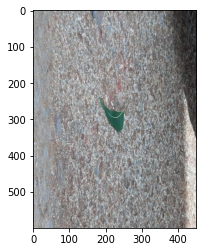

In [94]:
# How you can look at a particular picture

img = cv2.imread(os.path.join(data_dir, 'Neem', '998.jpg'))
plt.imshow(img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [96]:
#img_arr = cv2.imread(os.path.join(data_dir,'New folder','Mango','6.png'))
#img_arr.shape
#plt.imshow(cv2.cvtColor(img_arr,cv2.COLOR_BGR2RGB))
#plt.show()

#### This part just for extension checking.

In [124]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir,image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print("Issue with image {}".format(image_path))
            

## 1. Load Data

In [125]:
import numpy as np

In [126]:
#tf.keras.utils.image_dataset_from_directory??
# This specifies the parameters for preprocessing.
#tf.keras.utils.image_dataset_from_directory('data', batch_size = 16, image_size = (128,128))

In [127]:
data = tf.keras.utils.image_dataset_from_directory(os.path.join(data_dir))
# Bug fix
#data = tf.keras.utils.image_dataset_from_directory(os.path.join(data_dir, shuffle = False))
#data = data.shuffle(1000, seed = 100, reshuffle_each_iteration = False)

Found 235 files belonging to 2 classes.


In [128]:
#encoder = OneHotEncoder(sparse_output=False)

In [129]:
# Access data as np arrays.
data_iterator = data.as_numpy_iterator()

In [130]:
# This is labeled data 
batch = data_iterator.next()
print(batch[0].shape, batch[1])

(32, 256, 256, 3) [1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 0 1 0 1 1 1 0 1 0 1 0 1 1]


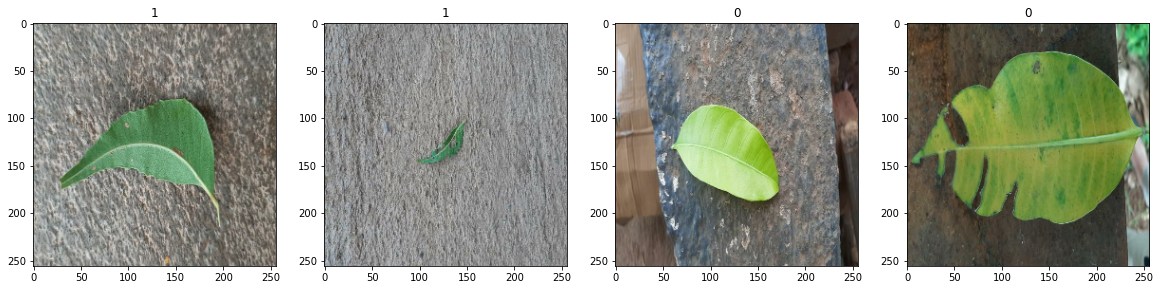

In [131]:
fig, ax = plt.subplots(ncols = 4, figsize = (20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
# Mango - 0 , Neem - 1, Peepal - 2 Arkish
# Mango - 0, Neem - 2, Lemon - 1 Armaan
# Neem = 1, Mango - 0

## 2. Preprocess Data

In [132]:
# The map function helps to apply transformation as we are accessing data.
data = data.map(lambda x,y: (x/255,y)) # batch[0]/255 and y left as it is.

In [133]:
scaled_iterator = data.as_numpy_iterator()

In [134]:
batch = scaled_iterator.next()
print(batch[0].max())

1.0


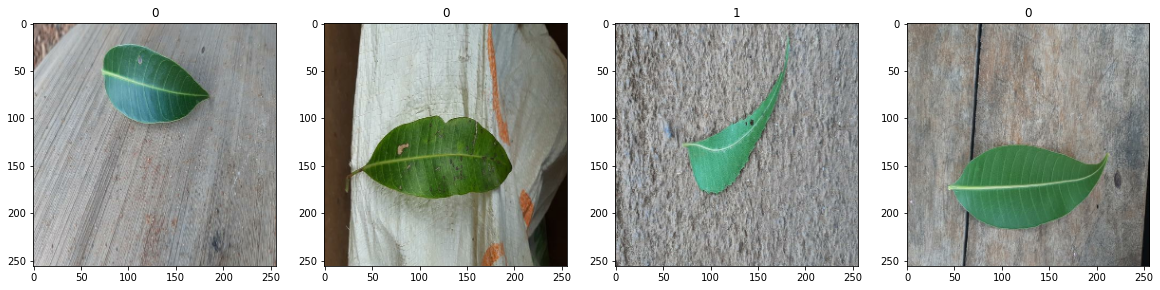

In [135]:
fig, ax = plt.subplots(ncols = 4, figsize = (20,20))

for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])
# Mango - 0 , Neem - 1, Peepal - 2
# Mango - 0, Neem - 2, Lemon - 1 Armaan

In [136]:
len(data) # no. of batches in our data

8

In [153]:
# Splitting our data into training, validation and test sets.
train_size = int(len(data)*0.7)
val_size = int(len(data)*0.2)  + 1
test_size = int(len(data)*0.1) + 1


In [154]:
train_size+val_size+ test_size

8

In [155]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(val_size)

In [156]:
len(test) +len(train)+ len(val) # just rechecking

8

## 3. Building the Model

In [157]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [158]:
model = Sequential()

In [143]:
#MaxPooling2D??

In [159]:
# 16 filters, size , stride. 
#These are hyperparameters we can tune. , activation sigmoid krke dekh skte
model.add(Conv2D(16,(3,3), 1, activation='relu',input_shape = (256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation ='relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [160]:
model.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])

In [161]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 30, 30, 16)      

### 3.1 Training


In [147]:
logdir = 'logs'

In [175]:
hist = model.fit(train, epochs = 40,validation_data= val)

Epoch 1/40


5/5 [==============================] - 5s 860ms/step - loss: 0.0589 - accuracy: 0.9812 - val_loss: 0.0803 - val_accuracy: 0.9844
Epoch 2/40
5/5 [==============================] - 4s 831ms/step - loss: 0.0516 - accuracy: 0.9750 - val_loss: 0.0458 - val_accuracy: 0.9844
Epoch 3/40
5/5 [==============================] - 4s 709ms/step - loss: 0.0536 - accuracy: 0.9812 - val_loss: 0.0615 - val_accuracy: 0.9844
Epoch 4/40
5/5 [==============================] - 4s 707ms/step - loss: 0.0485 - accuracy: 0.9937 - val_loss: 0.0160 - val_accuracy: 1.0000
Epoch 5/40
5/5 [==============================] - 4s 687ms/step - loss: 0.0309 - accuracy: 0.9937 - val_loss: 0.0398 - val_accuracy: 0.9844
Epoch 6/40
5/5 [==============================] - 4s 696ms/step - loss: 0.0212 - accuracy: 0.9937 - val_loss: 0.0150 - val_accuracy: 1.0000
Epoch 7/40
5/5 [==============================] - 4s 709ms/step - loss: 0.0270 - accuracy: 0.9937 - val_loss: 0.0126 - val_accuracy: 1.0000
Epoch 8/40
5/5 [===============

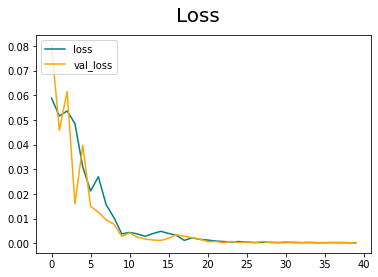

In [176]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

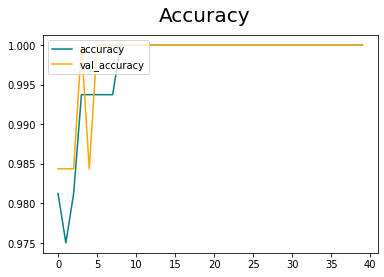

In [177]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [178]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [179]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [180]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 65ms/step


In [181]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


## Test


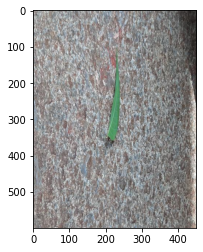

In [187]:
img = cv2.imread(os.path.join(data_dir, 'Neem', '1000.jpg'))
plt.imshow(img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

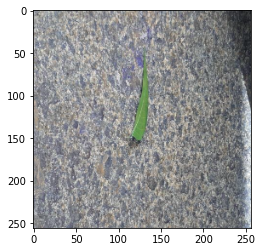

In [188]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [189]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 35ms/step


In [190]:
yhat

array([[0.9999999]], dtype=float32)

In [191]:
if yhat > 0.5: 
    print(f'Predicted class is Neem')
else:
    print(f'Predicted class is Mango')

Predicted class is Neem
